In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


root = '/Users/katherinequan/Documents/GitHub/Cogs189/'
cur_file=root+str('output_after_sliding.txt')
#print(cur_file)

#load txt file data samples
with open(cur_file) as data:
    content = data.readlines()

element_list=[] # initialize a list
test={} # initialize a dict

for i in range(len(content)):
    content[i] = content[i].strip('\n')
    content[i] = content[i].strip('[')
    content[i] = content[i].strip(']')
    content[i] = content[i].split(", ")
    content[i]=[float(c) for c in content[i]]
#     print(content)
    key = i+1
    test[key] = []
    for j in range(len(content[i])):
        element = (content[i][j])
        test[key].append(content[i][j])
        

#print(test)

In [8]:
# Converting into list of tuple 
test_list = [[data, label] for data, labels in test.items() for label in labels ] 
#print(test_list)

In [276]:
df = pd.DataFrame(test_list, columns=['labels', 'att_data'])
arrays = df.to_numpy()
med_array = np.random.randint(20, 65, size=len(arrays))
med_array = np.array(med_array).astype(np.float)
df_med = pd.DataFrame(med_array, columns = ['med_data'])
df = pd.concat([df, df_med], axis=1)
df[['att_data','med_data' ]]

,att_data,med_data
0,47.0,32.0
1,66.0,40.0
2,67.0,20.0
3,50.0,21.0
4,51.0,33.0
5,40.0,39.0
6,23.0,59.0
7,53.0,54.0
8,47.0,37.0
9,43.0,29.0


In [296]:
# create training and testing vars
# separate into four categories, 
# test_size=0.2 => the percentage of data that should be held over for testing, usually around 80/20 
X_train, X_test, y_train, y_test = train_test_split(df[['att_data','med_data' ]], arrays[:,0], test_size=0.2) 
X_train=np.reshape(X_train,(682, 2))
#y_train=np.reshape(y_train,(-1,1))
#X_test=np.reshape(y_train,(682,2))
#y_test=np.reshape(y_train,(-1,1))
# print(X_train)
print(X_train.shape) #shape(682, 2)
print(y_train.shape) #shape(682,)
print(X_test.shape)  #shape(171, 2)
print(y_test.shape)  #shape(171,)

(682, 2)
(682,)
(171, 2)
(171,)


In [297]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X) 
    #print(Y_pred)
    e = accuracy_score(Y, Y_pred) 
    #print("test error:", 1-e)
    return 1-e #1-e

In [299]:
# one vs rest clf
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
test_error_onevsrest = calc_error(X_test, y_test, clf)
print("OneVsRestClassifier test error: ", test_error_onevsrest)

OneVsRestClassifier test error:  0.7719298245614035


/Users/katherinequan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/katherinequan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/katherinequan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/katherinequan/anaconda3/

In [290]:
# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title('Training error w.r.t $C$ and $\gamma$')
    plt.show()

0.7434017595307918
0.7140762463343109
0.6627565982404693
0.6143695014662757
0.5601173020527859
0.49853372434017595
0.4354838709677419
0.3841642228739003


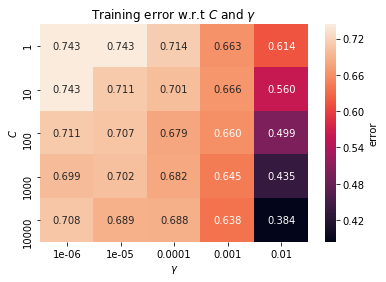

SVM BEST TEST ERROR: 0.384


In [300]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal gamma.

#initialize everything
best_C=-1
best_gamma=-1
best_error=10000000
best_classifier=None 
training_errors=np.zeros((len(C_list),len(gamma_list))) #initialize training_errors

for i in range(len(C_list)):
    
    for j in range(len(gamma_list)): 
        c=C_list[i]
        gamma=gamma_list[j] 
        classifier=svm.SVC(C=c, gamma=gamma) 
        classifier=classifier.fit(X_train,y_train)
        e_training=calc_error(X_train, y_train, classifier) 
        training_errors[i][j]=e_training 
        
        if(e_training<best_error):
            best_error=e_training 
            #print(best_error)
            best_C=c
            best_gamma=gamma 
            best_classifier=classifier

draw_heatmap(training_errors, gamma_list, C_list)
print("SVM BEST TEST ERROR: {:.3f}".format(best_error))

In [294]:
print('Best parameter C* = {}'.format(C))
print('Best parameter gamma* = {}'.format(gamma))
#print('Test error: {}'.format(calc_error(X_test, y_test, clf)))

Best parameter C* = 10000
Best parameter gamma* = 0.01


In [283]:
# using cluster to train data
from sklearn.cluster import KMeans
import numpy as np

#divide into 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [284]:
y_kmeans = kmeans.predict(X_train)
#print(X_train['att_data'])

Text(0, 0.5, 'meditation_data_samples')

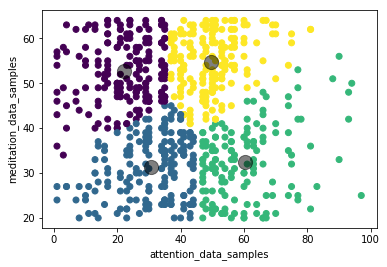

In [286]:
plt.scatter(X_train['att_data'], X_train['med_data'], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('attention_data_samples')
plt.ylabel('meditation_data_samples')

In [287]:
print(centers) # first col: attention data, second col: meditation data

[[22.29714286 52.73142857]
 [30.57541899 31.45810056]
 [60.38888889 32.43055556]
 [49.67934783 54.63043478]]


In [304]:
# using decision tree to train data
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
test_error_decisiontree = calc_error(X_test, y_test, clf)

print("Decision Tree test error : ", test_error_decisiontree)

Decision Tree test error :  0.7953216374269005
